In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\user\Downloads\perrin-freres-monthly-champagne-.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.columns=['Month','Sales']

In [5]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [7]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [8]:
df.drop(106,axis=0,inplace=True)
df.drop(105,axis=0,inplace=True)

In [9]:
df.shape

(105, 2)

In [10]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [11]:
df['Month']=pd.to_datetime(df['Month'])

In [12]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [13]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [14]:
df.set_index('Month',inplace=True)

In [15]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [16]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<AxesSubplot:xlabel='Month'>

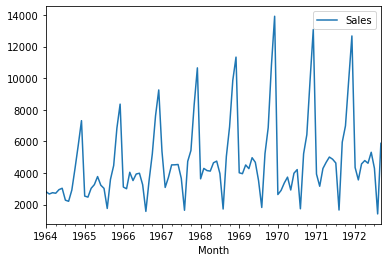

In [17]:
df.plot()

In [18]:
#adfuller test, p-value<0.05 then data is stationary

In [19]:
!pip install statsmodels

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
##hypothesis testing: 1. null-hypothsis(data not stationary) 2. alterante-hypothesis(data is stationary)
adfuller(df['Sales'])

(-1.8335930563276297,
 0.3639157716602417,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [22]:
def adfuller_test(sales):
    result=adfuller(sales)
    
    labels=['ADF test statistics','p-value','Lags used','Number of obs used']
    for value, label in zip(result,labels):
        print('{}: {}'.format(label, value))
    if result[1]<0.05:
        print('Strong evidence against null hypothesis & data is stationary')
    else:
        print('Weak evidence against null hypothesis, data not stationary')

In [23]:
adfuller_test(df['Sales'])

ADF test statistics: -1.8335930563276297
p-value: 0.3639157716602417
Lags used: 11
Number of obs used: 93
Weak evidence against null hypothesis, data not stationary


In [24]:
##for time series, data should be stationary 
##making data stationary using diferencing

In [25]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [26]:
df['Sales first diff']=df['Sales']-df['Sales'].shift(1)

In [27]:
df.head()

,Sales,Sales first diff
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [28]:
df['Seasonal first diff']=df['Sales']-df['Sales'].shift(12)

In [29]:
adfuller_test(df['Seasonal first diff'].dropna())

ADF test statistics: -7.626619157213163
p-value: 2.060579696813685e-11
Lags used: 0
Number of obs used: 92
Strong evidence against null hypothesis & data is stationary


<AxesSubplot:xlabel='Month'>

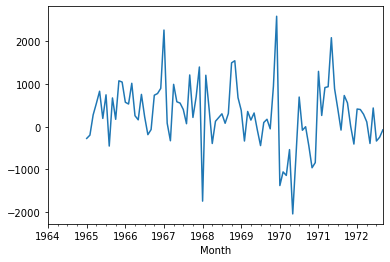

In [30]:
df['Seasonal first diff'].plot()

In [31]:
##applying arima model: AUTO-ARIMA
##AR+I+MA (p.d.q)
##A- Auto-regressive(p) 1- Integrating(d), MA-moving avg(q)
##P-PACF-PARTIAL AUTOCORELATION FACTOR
##d-Differencing 
##q-Auto correlation factor ACF

In [32]:
##Main goal of PACF, ACF have to minimise correlation in data

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [34]:
df.head(50)

,Sales,Sales first diff,Seasonal first diff
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [35]:
import matplotlib.pyplot as plt

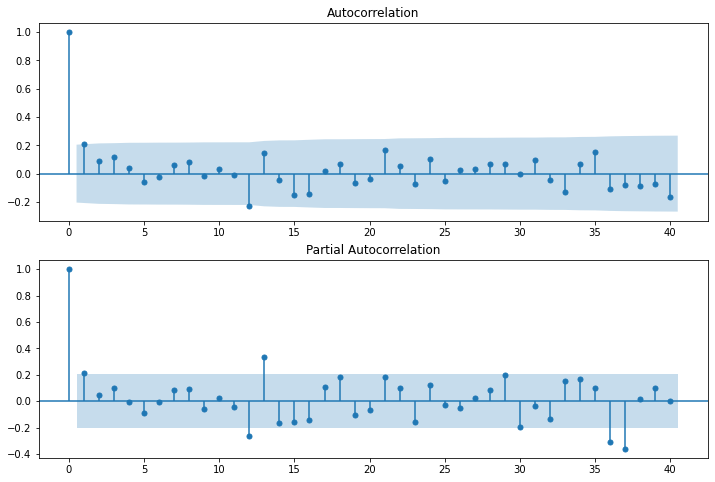

In [36]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df['Seasonal first diff'].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df['Seasonal first diff'].iloc[13:],lags=40,ax=ax2)

In [37]:
##q=1,p=1,d=1

In [38]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Sales'],order=(1,1,1))

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

In [39]:
model=model.fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Wed, 11 Aug 2021   AIC                           1910.251
Time:                        19:56:02   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7853     12.405      1.837      0.066      -1.529      47.099
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [41]:
df['forecast']=model.predict(start=90,end=103,dynamic=True)

In [42]:
df.tail(20)

,Sales,Sales first diff,Seasonal first diff,forecast
Month,,,,
1971-02-01,3162.0,-772.0,263.0,NaN
1971-03-01,4286.0,1124.0,916.0,NaN
1971-04-01,4676.0,390.0,936.0,NaN
1971-05-01,5010.0,334.0,2083.0,NaN
1971-06-01,4874.0,-136.0,888.0,NaN
1971-07-01,4633.0,-241.0,416.0,473.093408
1971-08-01,1659.0,-2974.0,-79.0,218.374684
1971-09-01,5951.0,4292.0,730.0,107.738696
1971-10-01,6981.0,1030.0,557.0,59.684427


In [43]:
##using SARIMAX- seasonal arima

In [44]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [45]:
results=model.fit()

In [46]:
df['forecast_SARIMAX']=results.predict(start=90,end=103,dynamic=True)

<AxesSubplot:xlabel='Month'>

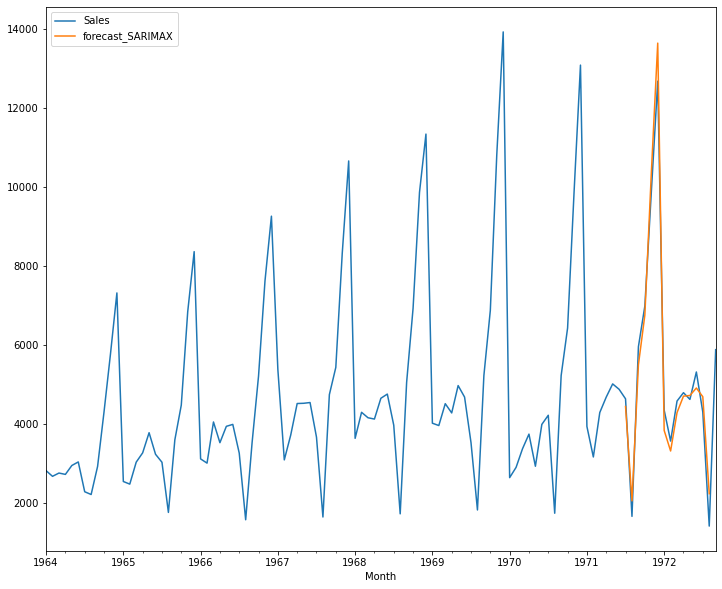

In [48]:
df[['Sales','forecast_SARIMAX']].plot(figsize=(12,10))

In [49]:
##using dateoffset to create additional dataset

In [51]:
from pandas.tseries.offsets import DateOffset 

In [56]:
future_dates=[df.index[-1] + DateOffset(months=x)for x in range(0,24)]

In [57]:
future_dataset=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [59]:
future_dataset.tail()

,Sales,Sales first diff,Seasonal first diff,forecast,forecast_SARIMAX
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [60]:
future_df=pd.concat([df,future_dataset])

In [61]:
future_df.shape

(128, 5)

In [64]:
future_df['forecast_SARIMAX2']=results.predict(start=104, end=124, dynamic=True)

<AxesSubplot:>

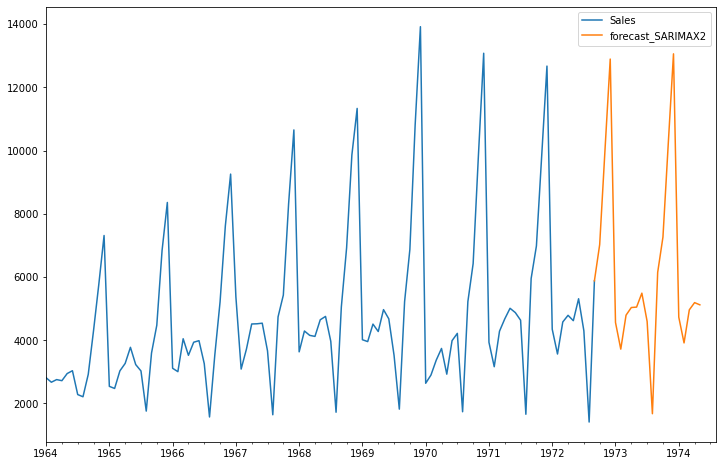

In [67]:
future_df[['Sales','forecast_SARIMAX2']].plot(figsize=(12,8))